In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [2]:
def var_trust_func(Y, numFrames=200):
    x = int(Y.shape[1]/numFrames)
    var_trust = np.ones(Y.shape)
    
    for i in range(0, Y.shape[1], numFrames):
        indice_start = i
        indice_stop = indice_start+numFrames

        Y_p = Y[:,indice_start:indice_stop]
        var_p = np.sqrt(Y_p.var(1))
        var_p = var_p.reshape(var_p.shape[0],1)   
        var_trust[:,indice_start:indice_stop] = var_p
        
    var_trust = var_trust / np.max(var_trust)
    return(var_trust)

def expand_contrast(contrast_p, shape, n_bands, deltaF):
    contrast = np.ones(shape)
    for i in range(0, n_bands+1):        
        if i == 0:
            indice_start = 0
        else:
            indice_start = deltaF * 2**(i-1)
        
        indice_stop = deltaF * 2**i - 1
        contrast[indice_start:indice_stop,:] = contrast_p[i,:]

    contrast[indice_stop+1:,:] = contrast_p[n_bands,:]    
    return(contrast)

# Retorna a máscara relativa ao contraste
def contrast_trust_func(Y, sr):
    n_bands = 8
    contrast_p = librosa.feature.spectral_contrast(S=Y, sr=sr, linear=True, n_bands=n_bands, fmin=64)
    deltaF = int(round(64/(sr/(2*Y.shape[0]))))
    contrast = expand_contrast(contrast_p, Y.shape, n_bands, deltaF)
    contrast /= np.max(contrast)
    return(contrast)

In [3]:
def get_masks(y, sr):
    
    Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
    Y_dB = librosa.amplitude_to_db(Y, ref=np.max)       
    var_trust = var_trust_func(Y_dB)
    contrast = contrast_trust_func(np.abs(Y), sr)
    return var_trust, contrast

In [4]:
y, sr = librosa.load("../../audio/48054_44k.wav", sr=44100)

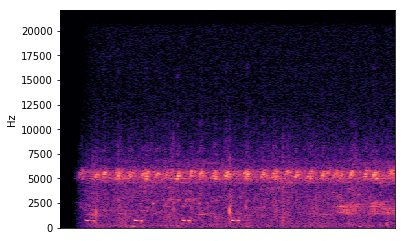

In [5]:
y = y[44100*4:44100*10]
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
librosa.display.specshow(Y_dB, y_axis='linear', sr=sr, hop_length = 512)

In [6]:
var, contrast = get_masks(y, sr)

(array([  69795.,  430571.,  294856.,  123986.,   35925.,   75200.,
          13800.,   14000.,     600.,     600.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

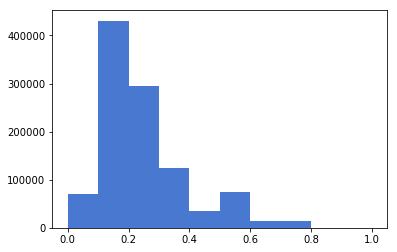

In [8]:
plt.hist(var.flatten(), range=(0,1), bins=10)

(array([  1.02644400e+06,   3.06800000e+04,   3.29000000e+02,
          2.82000000e+02,   3.76000000e+02,   2.35000000e+02,
          1.88000000e+02,   3.29000000e+02,   2.82000000e+02,
          1.88000000e+02]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

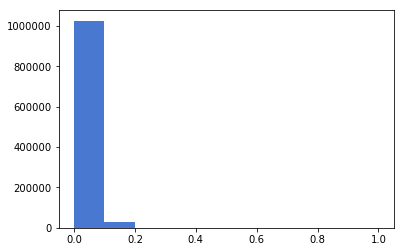

In [9]:
plt.hist(contrast.flatten(), range=(0,1), bins=10)

In [13]:
y, sr = librosa.load("../../audio/whittakeri.wav", sr=44100)

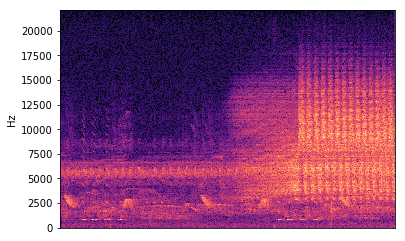

In [14]:
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
librosa.display.specshow(Y_dB, y_axis='linear', sr=sr, hop_length = 512)

In [15]:
var, contrast = get_masks(y, sr)

(array([  0.00000000e+00,   0.00000000e+00,   2.18548000e+05,
          1.49288200e+06,   9.79564000e+05,   2.97490000e+05,
          7.81140000e+04,   6.40000000e+03,   3.60000000e+03,
          1.00000000e+03]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

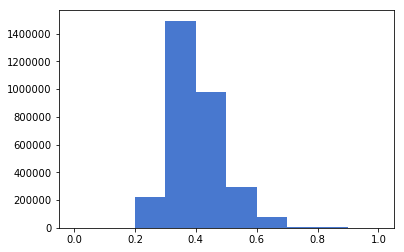

In [16]:
plt.hist(var.flatten(), range=(0,1), bins=10)

(array([  2.17032500e+06,   4.31687000e+05,   3.81875000e+05,
          7.58270000e+04,   1.23780000e+04,   1.51100000e+03,
          1.45700000e+03,   1.50400000e+03,   6.11000000e+02,
          4.23000000e+02]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

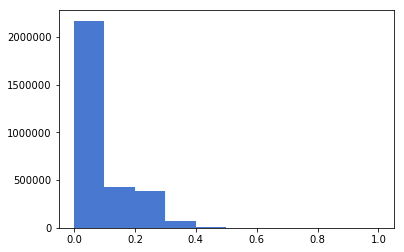

In [17]:
plt.hist(contrast.flatten(), range=(0,1), bins=10)